title: "Hands On II"
author: "Emma Juan Salazar (emma.juan01@estudiant.upf.edu) and Gary (gary.espitia01@estudiant.upf.edu)."

Download the data (design and tpm files) corresponding to the publication An RNASeq normal tissue atlas for mouse and rat. Download the gene expression data corresponding to the publication The Genotype-Tissue Expression (GTEx) pilot analysis: multitissue gene regulation in humans from the GTEX portal

From GTEX data, keep only tissues belonging to the following categories:

```r
gtex_tissues <-  c("colon", "ileum", "duodenum", "jejunum", "small intestine" , "muscle", "pancreas", "liver", "stomach",  "kidney", "quadriceps", "thymus", "heart" , "esophagus", "brain" )
```

Regarding the 3 data sources: rat_tpm.txt; mouse_tpm.txt and GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct we see that the labelling in incongruent and some organs were divided into more complex categories;

The given names didn't correspond to the headers of the dataset, so some of them were missing and others were grouped. In this case, this is the equivalent list:
"Colon - Sigmoid", "Colon - Transverse", "Small Intestine - Terminal Ileum", "Muscle - Skeletal", "Pancreas", "Liver", "Stomach", "Kidney - Cortex", "Kidney - Medulla", "Heart - Atrial Appendage", "Heart - Left Ventricle", "Esophagus - Gastroesophageal Junction", "Esophagus - Mucosa", "Esophagus - Muscularis"



Cluster tissues using gene expression data. Run k-means and hierarchical clustering. For each algorithm, determine the optimal number of clusters.
Compare the clustering results using both methodologies, and with the tissues/species. Show the results of the final partitions as a table.
Plot a heatmap of the 50 genes with top variance over all samples. Add the information about tissue groups and model (human, rat and mouse) as annotations in the heatmap*.

c:\Users\Gary\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gary\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gary\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Gary\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

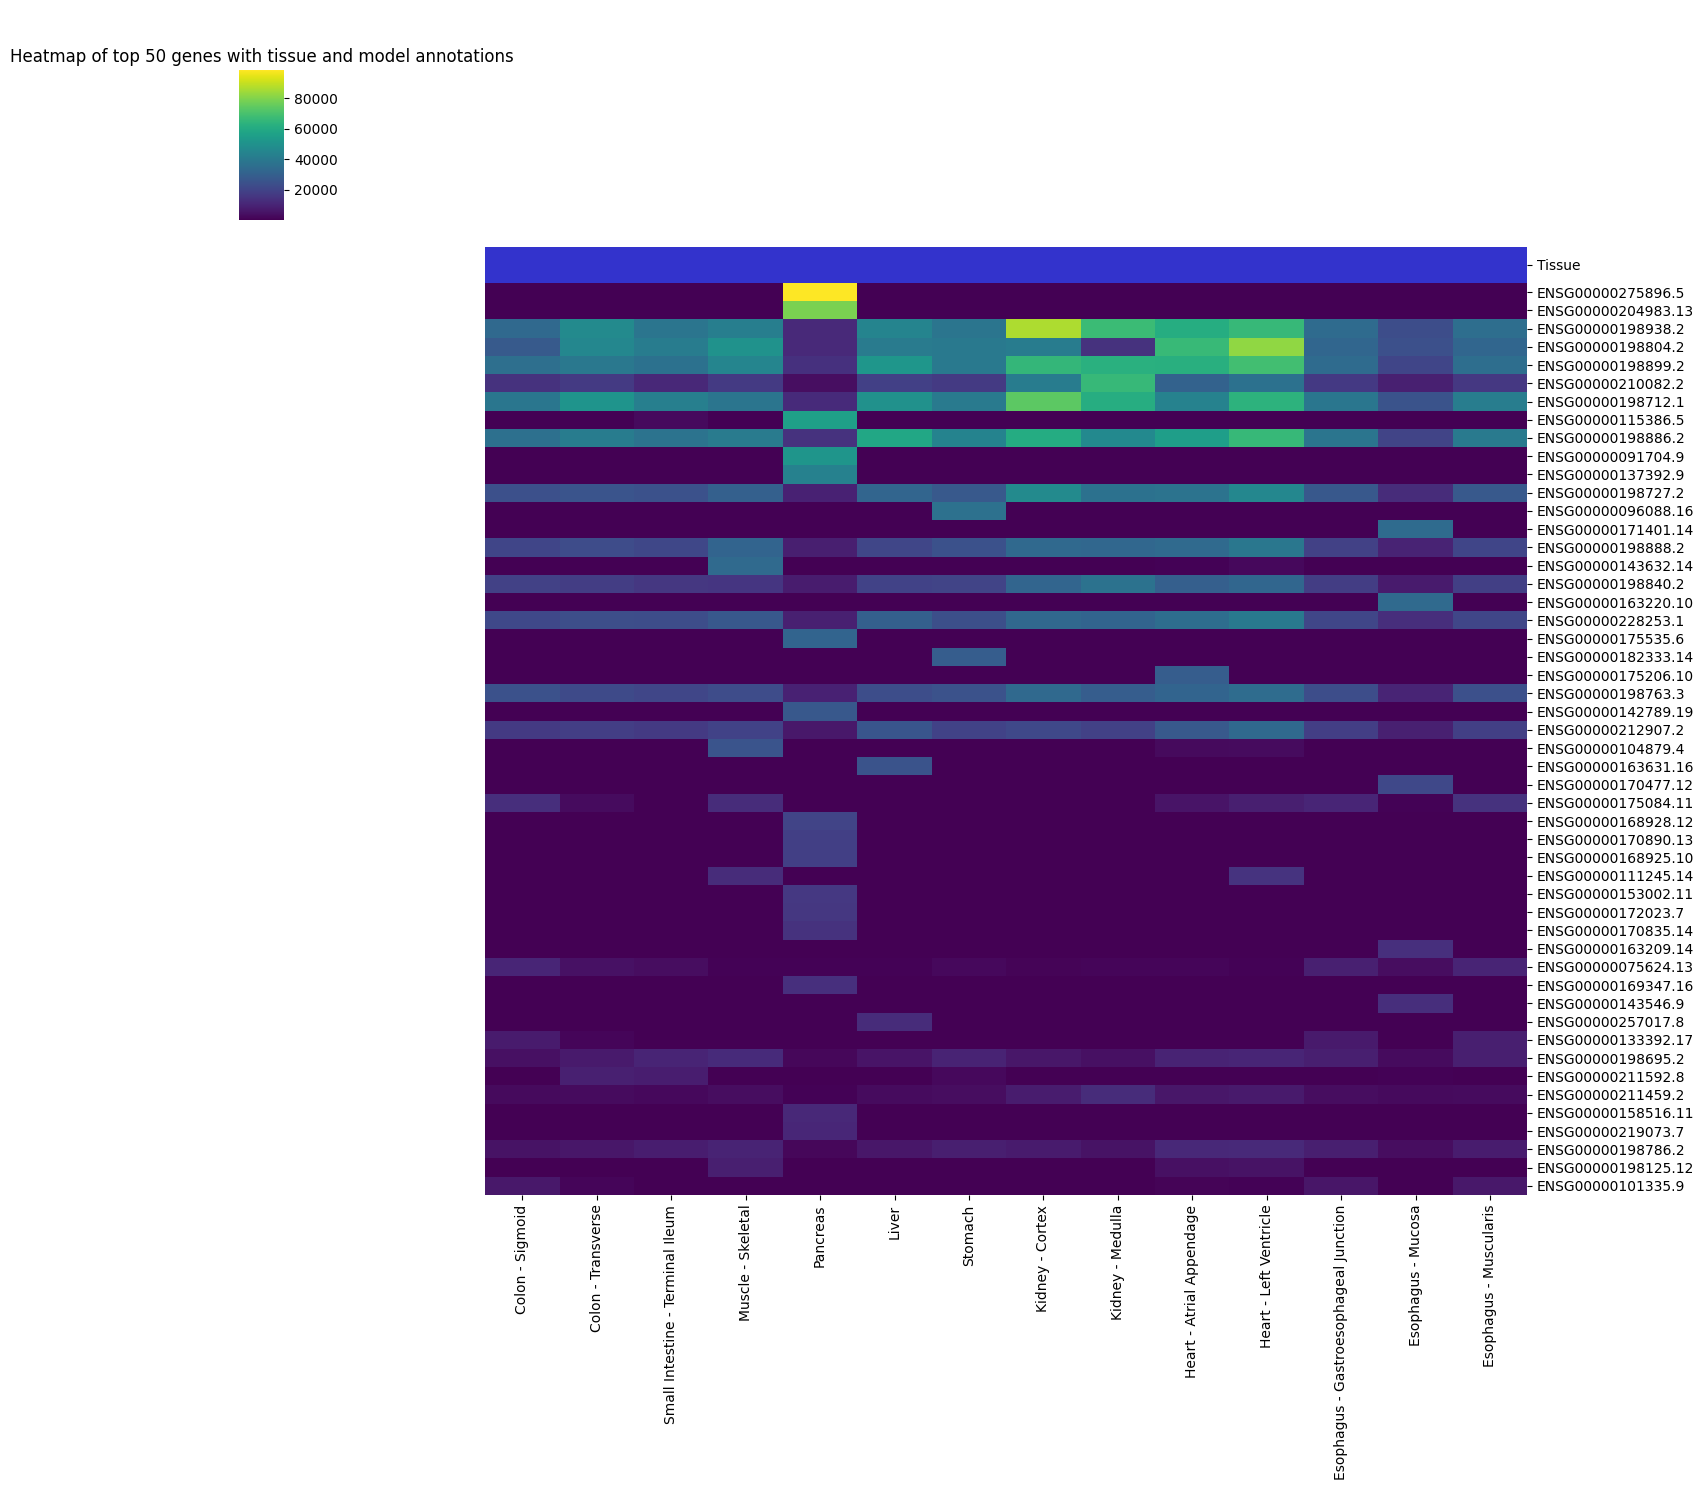

                    K-Means  Hierarchical
ENSG00000275896.5         0             0
ENSG00000204983.13        0             0
ENSG00000198938.2         1             0
ENSG00000198804.2         1             0
ENSG00000198899.2         1             0
ENSG00000210082.2         1             0
ENSG00000198712.1         1             0
ENSG00000115386.5         0             0
ENSG00000198886.2         1             0
ENSG00000091704.9         0             0
ENSG00000137392.9         0             0
ENSG00000198727.2         1             0
ENSG00000096088.16        0             0
ENSG00000171401.14        0             0
ENSG00000198888.2         1             0
ENSG00000143632.14        0             0
ENSG00000198840.2         1             0
ENSG00000163220.10        0             0
ENSG00000228253.1         1             0
ENSG00000175535.6         0             0
ENSG00000182333.14        0             0
ENSG00000175206.10        0             0
ENSG00000198763.3         1       

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Read in the GTEx data
gtex_df = pd.read_csv("data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct", sep="\t", skiprows=2, index_col=0)
gtex_df = gtex_df.loc[:, ["Colon - Sigmoid", "Colon - Transverse", "Small Intestine - Terminal Ileum", "Muscle - Skeletal", "Pancreas", "Liver", "Stomach", "Kidney - Cortex", "Kidney - Medulla", "Heart - Atrial Appendage", "Heart - Left Ventricle", "Esophagus - Gastroesophageal Junction", "Esophagus - Mucosa", "Esophagus - Muscularis"]]
gtex_df = gtex_df.dropna()

# Read in the rat data
rat_df = pd.read_csv("data/rat_tpm.txt", sep="\t", index_col=0, skiprows=1)
rat_df = rat_df.loc[:, rat_df.columns.str.contains("colon|ileum|duodenum|jejunum|small intestine|muscle|pancreas|liver|stomach|kidney|quadriceps|thymus|heart|esophagus|brain", case=False)]
rat_df = rat_df.dropna()

# Read in the mouse data
mouse_df = pd.read_csv("data/mouse_tpm.txt", sep="\t", index_col=0, skiprows=1)
mouse_df = mouse_df.loc[:, mouse_df.columns.str.contains("colon|ileum|duodenum|jejunum|small intestine|muscle|pancreas|liver|stomach|kidney|quadriceps|thymus|heart|esophagus|brain", case=False)]
mouse_df = mouse_df.dropna()

# Combine the three dataframes into one
combined_df = pd.concat([gtex_df, rat_df, mouse_df])

# Get the top 50 genes with the most variance across all samples
variances = combined_df.var(axis=1)
top_50_genes = variances.sort_values(ascending=False)[:50].index
heatmap_data = combined_df.loc[top_50_genes, :]

# Cluster using k-means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(heatmap_data)
kmeans_labels = kmeans.labels_

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(heatmap_data)
    silhouette_scores.append(silhouette_score(heatmap_data, kmeans.labels_))

optimal_kmeans_clusters = np.argmax(silhouette_scores) + 2  # add 2 because range started at 2

# Cluster using hierarchical clustering
linkage_matrix = linkage(heatmap_data, method="ward")
dendrogram = dendrogram(linkage_matrix, no_plot=True)
hierarchical_labels = pd.Series([0] * len(heatmap_data), index=heatmap_data.index)
for i, c in enumerate(dendrogram["color_list"]):
    if c != "C0":
        hierarchical_labels[dendrogram["ivl"][i]] = int(c[1:])

# Create a table of the final partitions
partitions = pd.DataFrame(index=heatmap_data.index)
partitions["K-Means"] = kmeans_labels
partitions["Hierarchical"] = hierarchical_labels

# Add information about tissue groups and model to the heatmap
tissue_groups = ["Human"] * len(gtex_df.columns) + ["Rat"] * len(rat_df.columns) + ["Mouse"] * len(mouse_df.columns)
tissue_colors = {"Human": (0.2, 0.2, 0.8), "Rat": (0.8, 0.2, 0.2), "Mouse": (0.2, 0.8, 0.2)}
tissue_colors = pd.Series(tissue_groups, index=combined_df.columns).map(tissue_colors)
col_colors = pd.DataFrame(tissue_colors, columns=["Tissue"]).loc[heatmap_data.columns, :]

# Plot the heatmap
sns.clustermap(heatmap_data, cmap="viridis", row_cluster=False, col_cluster=False, yticklabels=True, figsize=(15, 15), cbar_pos=(0.02, 0.85, 0.03, 0.1), col_colors=col_colors)
plt.title("Heatmap of top 50 genes with tissue and model annotations")
plt.show()

# Show the final partitions table
print(partitions)



## Exercise 2: Dimensionality reduction
### PCA
With the gene expression for different tissues and models, perform a PCA on the data and visualize the results (PC1 and PC2, and also, PC3). 
Label the points in the plot with their respective tissues/models.

Visualize the data using the PC1 and PC2 again, but this time, color the observations by cluster, using the k means clusters, with k of your choice. Produce a caption for the plot

What are the top 50 genes that contribute to the PC1? Are they the same genes that are more variable according to the exercise 1?


c:\Users\Gary\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


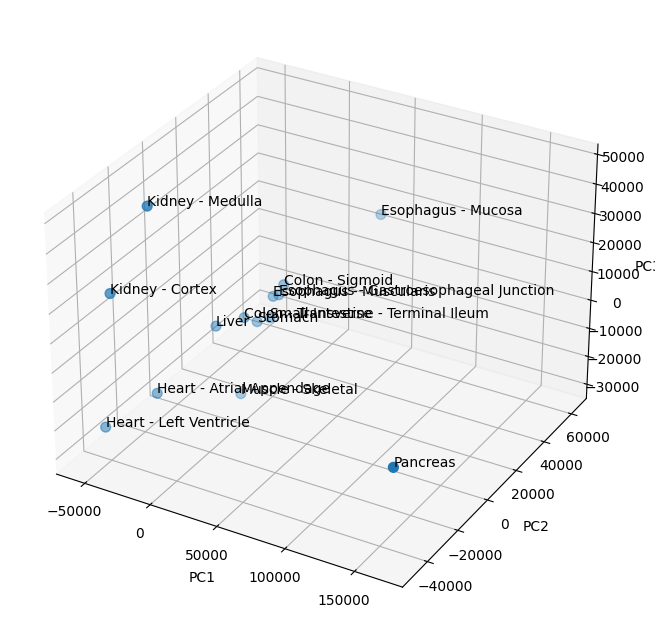

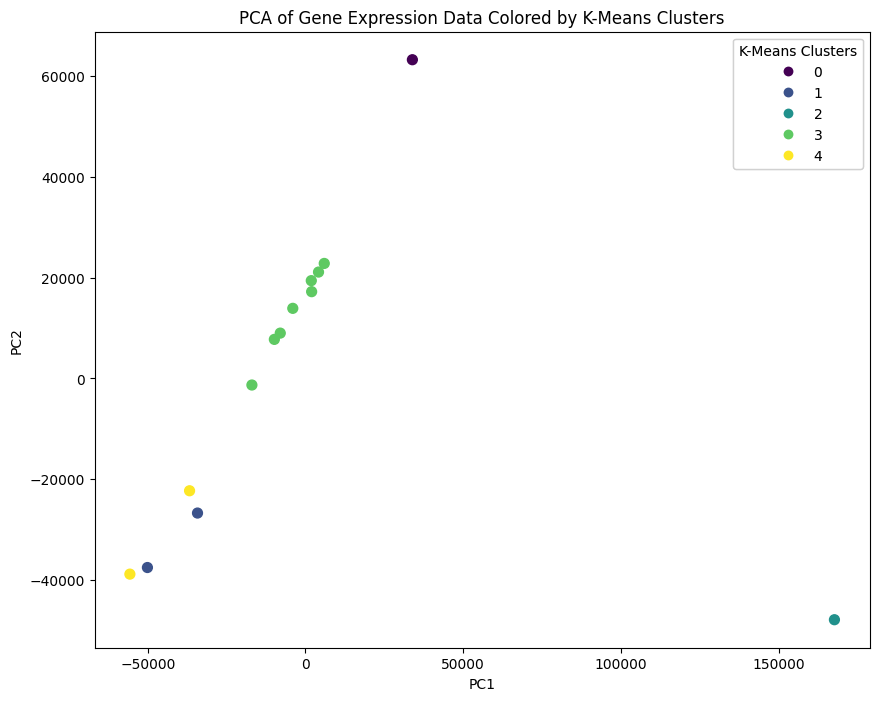

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine the data into a single DataFrame
# Read in the GTEx data
gtex_df = pd.read_csv("data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct", sep="\t", skiprows=2, index_col=0)
gtex_df = gtex_df.loc[:, ["Colon - Sigmoid", "Colon - Transverse", "Small Intestine - Terminal Ileum", "Muscle - Skeletal", "Pancreas", "Liver", "Stomach", "Kidney - Cortex", "Kidney - Medulla", "Heart - Atrial Appendage", "Heart - Left Ventricle", "Esophagus - Gastroesophageal Junction", "Esophagus - Mucosa", "Esophagus - Muscularis"]]
gtex_df = gtex_df.dropna()

# Read in the rat data
rat_df = pd.read_csv("data/rat_tpm.txt", sep="\t", index_col=0, skiprows=1)
rat_df = rat_df.loc[:, rat_df.columns.str.contains("colon|ileum|duodenum|jejunum|small intestine|muscle|pancreas|liver|stomach|kidney|quadriceps|thymus|heart|esophagus|brain", case=False)]
rat_df = rat_df.dropna()

# Read in the mouse data
mouse_df = pd.read_csv("data/mouse_tpm.txt", sep="\t", index_col=0, skiprows=1)
mouse_df = mouse_df.loc[:, mouse_df.columns.str.contains("colon|ileum|duodenum|jejunum|small intestine|muscle|pancreas|liver|stomach|kidney|quadriceps|thymus|heart|esophagus|brain", case=False)]
mouse_df = mouse_df.dropna()

all_data = pd.concat([gtex_df, rat_df, mouse_df], axis=1)

# Fill NaN values with 0
all_data.fillna(0, inplace=True)

# Perform PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(all_data.T)

# Extract PC1, PC2, and PC3
pc1 = pca_data[:, 0]
pc2 = pca_data[:, 1]
pc3 = pca_data[:, 2]

# Visualize PC1 vs. PC2 vs. PC3
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc1, pc2, pc3, s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Label points with tissues and models
for i, txt in enumerate(all_data.columns):
    tissue_model = txt.split("_")[0]
    ax.text(pc1[i], pc2[i], pc3[i], tissue_model)

# Visualize PC1 vs. PC2 with colors corresponding to k-means clusters
k = 5  # choose number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_clusters = kmeans.fit_predict(all_data.T)

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(pc1, pc2, c=kmeans_clusters, cmap="viridis", s=50)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="K-Means Clusters")
ax.add_artist(legend1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA of Gene Expression Data Colored by K-Means Clusters')
plt.show()


### tSNE
Perform t-SNE on the dataset and visualize the results. Test at least 2 perplexity values.
In this case, for convenience we decided to use the whole data of GTE due perplexity needs to be less that amount of n_samples.

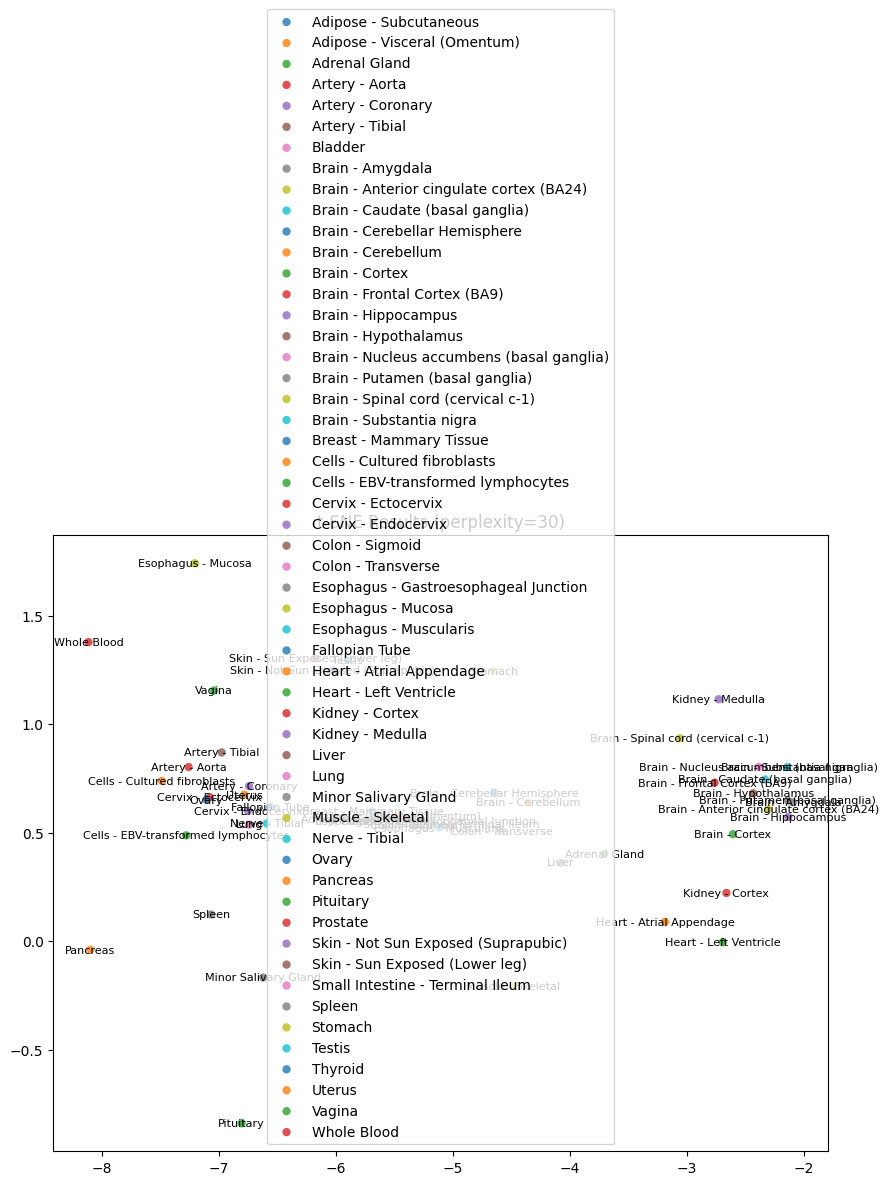

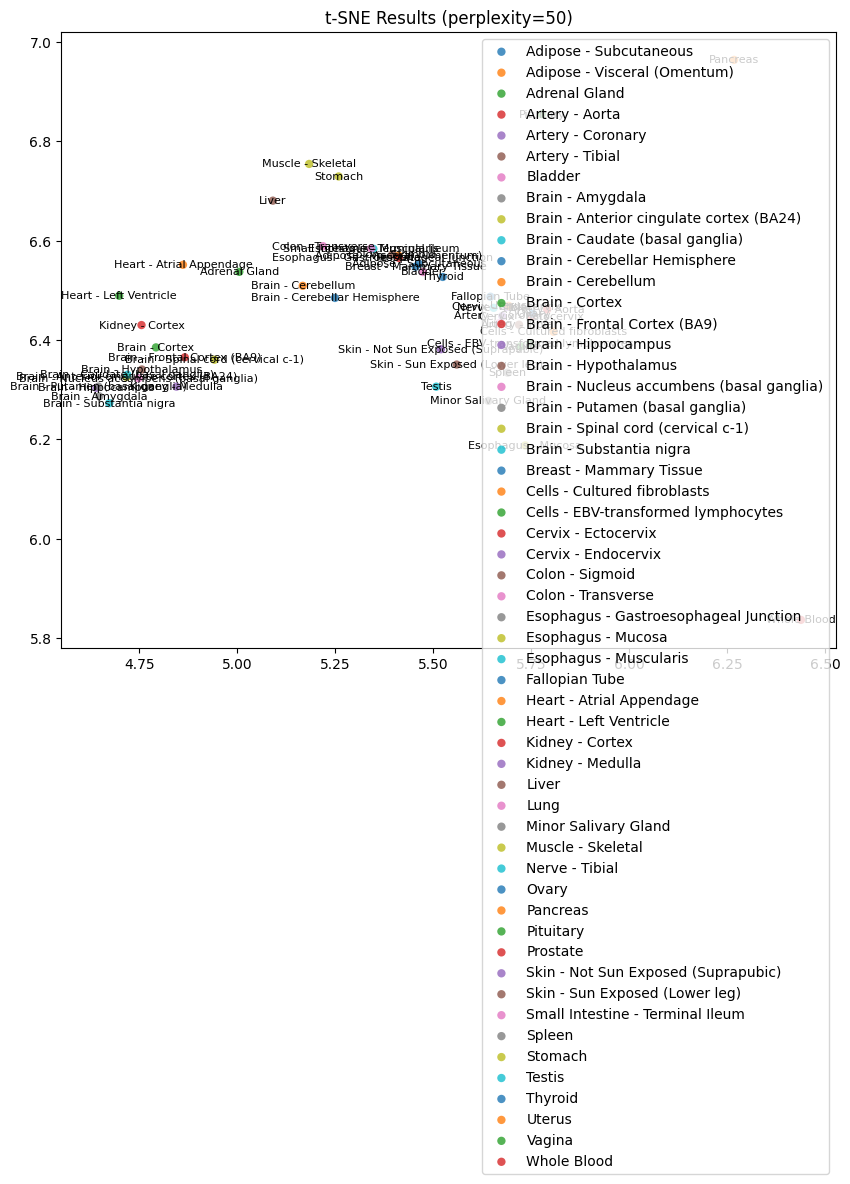

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Read in the data
df = pd.read_csv("data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct", skiprows=2, sep='\t')
tissues = df.columns[2:]
# Perform PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(df[tissues].values.T)

# Perform t-SNE with perplexity=30
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne_30 = tsne.fit_transform(X_pca)

# Perform t-SNE with perplexity=50
tsne = TSNE(n_components=2, perplexity=50, random_state=0)
X_tsne_50 = tsne.fit_transform(X_pca)

# Visualize t-SNE results with perplexity=30
fig, ax = plt.subplots(figsize=(10, 8))
for i, tissue in enumerate(tissues):
    x, y = X_tsne_30[i]
    ax.scatter(x, y, alpha=0.8, label=tissue, edgecolors='none')
    ax.text(x, y, tissue, ha='center', va='center', fontsize=8)
ax.set_title('t-SNE Results (perplexity=30)')
ax.legend()
plt.show()

# Visualize t-SNE results with perplexity=50
fig, ax = plt.subplots(figsize=(10, 8))
for i, tissue in enumerate(tissues):
    x, y = X_tsne_50[i]
    ax.scatter(x, y, alpha=0.8, label=tissue, edgecolors='none')
    ax.text(x, y, tissue, ha='center', va='center', fontsize=8)
ax.set_title('t-SNE Results (perplexity=50)')
ax.legend()
plt.show()